In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft


# Computer Vision Lecture 1

## 1.1.0) 1D Fourier Transforms

### Basic periodic function: sine waves


$y(t) = A \sin(\omega t + \phi)$

$y(x) = A \sin(k t + \phi)$

where $A$ is the amplitude, $\omega$ is $\textit{time}$-frequency, $k$ is a $\textit{spatial}$-frequency and $\phi$ is the phase shift

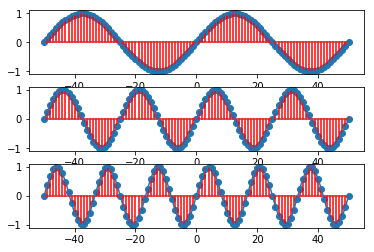

In [9]:
f_s = 50 # sample rate / "resolution"
f = 1 # the frequency of the signal
A = 1 # Amplitude
p = 0 # phase

x = np.arange(-f_s,(f_s+1)) # points for horizontal axis
# compute the sin wave
y_0= [A*np.sin(2*np.pi*f*(i/f_s) + p*np.pi/180) for i in np.arange(-f_s,(f_s+1))]
y_1 = [A*np.sin(2*2*np.pi*f*(i/f_s) + p*np.pi/180) for i in np.arange(-f_s,(f_s+1))]
y_2 = [A*np.sin(3*2*np.pi*f*(i/f_s) + p*np.pi/180) for i in np.arange(-f_s,(f_s+1))]

# plot the sine wave
plt.subplot(3,1,1)
plt.stem(x,y_0,'r',)
plt.plot(x,y_0)

plt.subplot(3,1,2)
plt.stem(x,y_1,'r',)
plt.plot(x,y_1)

plt.subplot(3,1,3)
plt.stem(x,y_2,'r',)
plt.plot(x,y_2)

plt.show()

### 1.1.1) Principle of Superposition:
#### When $n$ waves interact the resulting wave is the sum of the interacting waves.

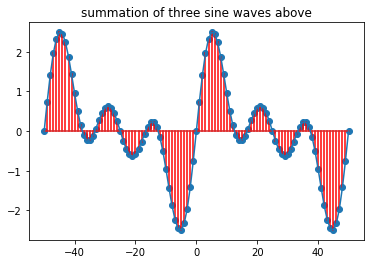

In [10]:
A3 = 1
A4 = 1
A5 = 1
p3 = 0
p4 = 0
p5 = 0


y_total = [A3*np.sin(2*np.pi*f*(i/f_s) + p3*np.pi/180) +
           A4*np.sin(2*2*np.pi*f*(i/f_s) + p4*np.pi/180) +
           A5*np.sin(3*2*np.pi*f*(i/f_s) + p5*np.pi/180)
           for i in np.arange(-f_s,(f_s+1))]

plt.stem(x,y_total,'r',)
plt.plot(x,y_total)
plt.title('summation of three sine waves above')
plt.show()

#### So, if we can add sine waves, then we can take them apart, ie a Fourier decomposition / transform
##### The goal: given a periodic function, find a series of sine waves that if added up would give that periodic function


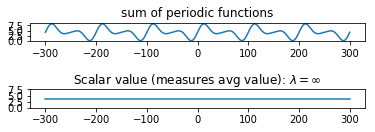

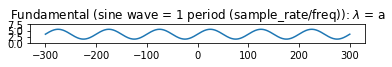

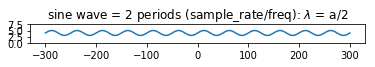

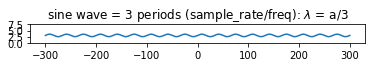

In [11]:
# parameter settings for the sine waves
A3 = 1.8
A4 = 2.4
A5 = .6
p3 = 0
p4 = 0
p5 = 0
f_2 = 3
f_s2 = 300
x2 = np.arange(-f_s2,(f_s2+1))

# addition of three sine waves
y_total = [A3*np.sin(2*np.pi*f_2*(i/f_s2) + p3*np.pi/180) +
           A4*np.sin(2*2*np.pi*f_2*(i/f_s2) + p4*np.pi/180) +
           A5*np.sin(3*2*np.pi*f_2*(i/f_s2) + p5*np.pi/180) + 4.2
           for i in np.arange(-f_s2,(f_s2+1))]

y_0 = [3.5 for i in np.arange(-f_s2,(f_s2+1))]

y_fund = [3.5+ 2*np.sin(6*np.pi*f*(i/f_s2) + 0*np.pi/180) for i in np.arange(-f_s2,(f_s2+1))]
y_2nd = [4+ 1*np.sin(12*np.pi*f*(i/f_s2) + 0*np.pi/180) for i in np.arange(-f_s2,(f_s2+1))]
y_3rd = [3+ .5*np.sin(18*np.pi*f*(i/f_s2) + 0*np.pi/180) for i in np.arange(-f_s2,(f_s2+1))]

plt.subplot(10,1,1)
plt.plot(x2,y_total)
plt.yticks(np.arange(0,10,2.5))
plt.title('sum of periodic functions')

plt.subplot(10,1,4)
plt.plot(x2, y_0)
plt.yticks(np.arange(0,10,2.5))
plt.title('Scalar value (measures avg value): $\lambda = \infty$')
plt.show()

plt.subplot(10,1,6)
plt.plot(x2, y_fund)
plt.yticks(np.arange(0,10,2.5))
plt.title('Fundamental (sine wave = 1 period (sample_rate/freq)): $\lambda$ = a')
plt.show()

plt.subplot(10,1,8)
plt.plot(x2, y_2nd)
plt.yticks(np.arange(0,10,2.5))
plt.title('sine wave = 2 periods (sample_rate/freq): $\lambda$ = a/2')
plt.show()

plt.subplot(10,1,10)
plt.plot(x2, y_3rd)
plt.yticks(np.arange(0,10,2.5))
plt.title('sine wave = 3 periods (sample_rate/freq): $\lambda$ = a/3')
plt.show()

#### So on and on....
##### It matters how many decomposition terms it takes to acheive the solution. The number of terms used is known as the resolution. How exact your Fourier decomposition depends on the number of terms used (resolution).

##### Given any continuous periodic function, it can be decomposed into a series of sine and cosine functions:

\begin{equation}
f(x) = \frac{A_0}{2} + \sum_{n=1}^{\infty} A_n cos(\frac{2\pi nx}{\lambda}) + \sum_{n=1}^{\infty} B_n sin(\frac{2\pi nx}{\lambda})
\end{equation}

where,

\begin{equation}
A_n = \frac{2}{\lambda} \int_{0}^{\lambda} f(x) cos(\frac{2\pi nx}{\lambda}) dx
\end{equation}

\begin{equation}
B_n = \frac{2}{\lambda} \int_{0}^{\lambda} f(x) sin(\frac{2\pi nx}{\lambda}) dx
\end{equation}

the amplitudes tell you how much of the sine-wave, $n$ is in the continuous periodic function, $f(x)$

## 1.2.0) 1D Reciprocal Space

##### calculate the FFT on a 1D array

[ 0.3  0.4  1.3  3.4  4.5  4.2  2.8  2.4  1.4  0.1]


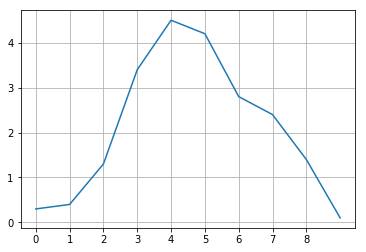

In [12]:
one_d_pixel_vals =  np.array([0.3, 0.4, 1.3, 3.4, 4.5, 4.2, 2.8, 2.4, 1.4, 0.1])
print(one_d_pixel_vals)

plt.plot(one_d_pixel_vals)
plt.yticks(np.arange(5))
plt.xticks(np.arange(9))
plt.grid(True)
plt.show()



##### Returns a list of 10 numbers (+2 for the "DC" component): $(A_0, P_0, A_1, P_1, A_2, P_2, A_3, P_3, A_4, P_4, A_5, P_5)$

$A_0$ = Amplitude of the average value, "DC" $\lambda = \infty$ component

$P_0$ = Flat wave, so phase doesn't say anything meaningful

$A_1$ = Amplitude of the fundamental, $\lambda = 1a$

$P_1$ = Phase of the fundamental frequency component

$A_2$ = Amplitude of the first harmonic $\lambda = 2a$

$P_2$ = Phase of the first harmonic frequency component

$A_3$ = Amplitude of the second harmonic $\lambda = 3a$

$P_3$ = Phase of the second harmonic frequency component

$A_4$ = Amplitude of the third harmonic $\lambda = 4a$

$P_4$ = Phase of the third harmonic frequency component

$A_5$ = Amplitude of the Nyquist frequency

$P_5$ = Phase of the Nyquist

where $a$ is the period. Nyquist frequency is the highest frequency component that is present in the image. An array of length 10 is 10 pixels. The fastest frequency possible is one in which the max is in pixel $i$ and the min is in pixel $i+1$. For images the Nyquist frequency ( $f_{Nyq} = pixel_{total}/2$ )

#### 1.2.1) Python np.fft.fft output

For numpy fft, the output for a given array, $a$; $a[0]$ is the mean. $a[1]$ = np.conjugate($a[-1]$)

where $a[k],a[-k]$ represent the $k_{th}$ harmonic

So the ouptput for a np.fft.fft($a$), where $a$ is 10 pixels contains amplitudes only: 

$a[0]$ = mean

$a[1]$ =  $a[-1]$ = $a[9]$ = fundamental (at $\pm k$)

$a[2]$ =  $a[-2]$ = $a[8]$ = first harmonic (at $\pm k$)

$a[3]$ =  $a[-3]$ = $a[7]$ = second harmonic (at $\pm k$)

$a[4]$ =  $a[-4]$ = $a[6]$ = third harmonic (at $\pm k$)

$a[5]$ =  Nyquist Frequency (at $\pm k$)

In [30]:
one_d_fft = np.fft.fft(one_d_pixel_vals, norm='ortho')
print("for a 1D array given by: ", one_d_pixel_vals)
print("The fft returns an array of length {} with values : ".format(len(one_d_fft)) )
print(one_d_fft)


for a 1D array given by:  [ 0.3  0.4  1.3  3.4  4.5  4.2  2.8  2.4  1.4  0.1]
The fft returns an array of length 10 with values : 
[ 6.57753753 +0.00000000e+00j -3.27588825 -6.42423464e-01j
  0.01065311 +6.25512087e-01j  0.22429031 -4.34214340e-01j
  0.25814049 -7.06019011e-02j -0.06324555 -1.12346671e-15j
  0.25814049 +7.06019011e-02j  0.22429031 +4.34214340e-01j
  0.01065311 -6.25512087e-01j -3.27588825 +6.42423464e-01j]


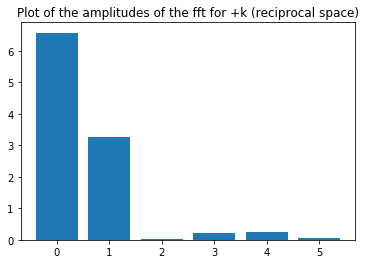

In [31]:
# Plot FFT and explain reciprocal space here

amplitudes =[]
for i in range(round(one_d_fft.size/2)+1):
        amplitudes.append(np.real(one_d_fft[i]))
plt.bar(np.arange(len(amplitudes)), np.abs(amplitudes))
plt.title("Plot of the amplitudes of the fft for +k (reciprocal space)")
plt.show()

#### To find the frequencies of the fft, look at the code below

In [39]:
x = np.array([0.3, 0.4, 1.3, 3.4, 4.5, 4.2, 2.8, 2.4, 1.4, 0.1])
w = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x))

for coef,freq in zip(w,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=round(coef,2),f=round(freq,2)))


(20.8+0j) * exp(2 pi i t * 0.0)
(-10.36-2.03j) * exp(2 pi i t * 0.1)
(0.03+1.98j) * exp(2 pi i t * 0.2)
(0.71-1.37j) * exp(2 pi i t * 0.3)
(0.82-0.22j) * exp(2 pi i t * 0.4)
(-0.2-0j) * exp(2 pi i t * -0.5)
(0.82+0.22j) * exp(2 pi i t * -0.4)
(0.71+1.37j) * exp(2 pi i t * -0.3)
(0.03-1.98j) * exp(2 pi i t * -0.2)
(-10.36+2.03j) * exp(2 pi i t * -0.1)


### HW question 1 - for common 512 by 512 image, what is the Nyquiest Frequency?

In [20]:
# put answer here

   ### HW question 2 - What is the inverse Fourier Transform of the array "one_d_fft"?

In [21]:
# put answer here

### HW question 3 - Find the fft amplitudes and frequencies for $A \cos(kx)$, $A(3+ \cos(3kx))$, your own function

In [ ]:
# put answer here

### HW question 4 - Plot the array "one_d_pixel_vals" and the plane waves of the FFT on the same plot

In [23]:
# put answer here

### *HW question 5 - plot the sum of the three sine waves in section 1.1.1 for 100, 50, 25, and 12  pixels per period. Take the FFT for each different sampling rate / resolution. Plot the amplitudes in reciprocal space. What do you see? 

In [ ]:
# put answer here